# Data Absen TKJP Mandays dan Volume

In [1]:
tanggal = "15"
bulan = "08"
bulan_ = "Agustus"

In [2]:
import pandas as pd

data_file = "D:/Pertamina/Rekap Absen TKJP/"+bulan_+"/"+tanggal+"-"+bulan+"-2021/"+tanggal+"-"+bulan+"-2021.xlsx"
data_file_ap = "D:/Pertamina/Rekap Absen TKJP/"+bulan_+"/"+tanggal+"-"+bulan+"-2021/"+tanggal+"-"+bulan+"-2021_ap.xlsx"
data_export = "D:/Pertamina/Rekap Absen TKJP/"+bulan_+"/"+tanggal+"-"+bulan+"-2021/Report "+tanggal+" "+bulan_+" 2021.xlsx"
data_export_ap = "D:/Pertamina/Rekap Absen TKJP/"+bulan_+"/"+tanggal+"-"+bulan+"-2021/Report TKJP Pertamina Group "+tanggal+" "+bulan_+" 2021.xlsx"

In [3]:
df = pd.read_excel(data_file,index_col='Waktu_Mulai')
df.head()

df1=df.loc[df['IsTKJP_Volume'].isin([False])]

In [4]:
df1.index = pd.DatetimeIndex(df1.index)

fil = df1.between_time('0:0','10:30')

# Data Rekap Absen TKJP AP



In [5]:
df_ap = pd.read_excel(data_file_ap)

In [6]:
df_ap=df_ap.loc[df_ap['TKJP'].isin([True])]

with pd.ExcelWriter(data_export_ap) as writer:
    df_ap.to_excel(writer, sheet_name='Data')
    #lala.to_excel(writer,sheet_name='Rekap')
    

# Sort Ada keluhan dan Anak Perusahaan



In [7]:
dat = fil.sort_values(by='Keluhan_Kesehatan',ascending=False)

In [8]:
ap = fil[fil['Lokasi_Kerja/Unit'] == 'Anak Perusahaan']

# Replace Anak Perusahaan

In [9]:
bla = dat.replace(to_replace ="Anak Perusahaan", 
                 value ="Gedung Utama - KP") 

# Pivot

In [10]:
import numpy as np

pivot = pd.pivot_table(bla, values='Nama_Lengkap', index=['Lokasi_Kerja/Unit'],
                      columns=['Sistem_Kerja'], aggfunc=np.count_nonzero, margins=True)
pivot = pivot.fillna("0") 

In [11]:
pivot2 = pd.pivot_table(bla, index=['Lokasi_Kerja/Unit'],values='Nama_Lengkap',
                      columns=['Keluhan_Kesehatan'], aggfunc=np.count_nonzero, margins=True)
pivot2 = pivot2.drop(['All'], axis=1)
pivot2 = pivot2.fillna("0") 



#  Export To XLSX

In [12]:
with pd.ExcelWriter(data_export) as writer:
    fil.to_excel(writer, sheet_name='Mandays')
    dat.to_excel(writer, sheet_name='RAW Data')
    ap.to_excel(writer, sheet_name='Sheet1')
    pivot.to_excel(writer, sheet_name='PIVOT')
    pivot2.to_excel(writer, sheet_name='PIVOT')
    #lala.to_excel(writer,sheet_name='Rekap')
    



#  Rekapitulasi Data

In [13]:
#pivot.head()

pivot['Kantor Pusat/Kantor Unit'] = pivot['Kantor Pusat/Kantor Unit'].astype(int)
pivot['Work From Home']= pivot['Work From Home'].astype(int)
pivot['Shift : ON']= pivot['Shift : ON'].astype(int)
pivot2['Tidak']= pivot2['Tidak'].astype(int)
pivot2['Ya']= pivot2['Ya'].astype(int)

In [14]:
wfh = pivot['Work From Home']
wfo = pivot['Kantor Pusat/Kantor Unit']+pivot['Shift : ON']
total = pivot['All']
other = total - (wfh+wfo)
wfh_ = wfh/total
fit = pivot2['Tidak']
ada_keluhan = pivot2['Ya']
ada_keluhan_ = ada_keluhan / fit

data = [total,wfh,wfo,other,wfh_,fit,ada_keluhan,ada_keluhan_] 
lala = pd.DataFrame(data,index=['Jumlah TKJP Mengisi Absensi','WFH','WFO','Other','%WFH',
                               'Fit','Ada Keluhan','% Ada Keluhan'])

lala = lala.fillna("0") 
lala = lala.T
lala['%WFH'] = lala['%WFH'].map('{:,.2%}'.format)
lala['% Ada Keluhan'] = lala['% Ada Keluhan'].map('{:,.2%}'.format)
lala.head()


,Jumlah TKJP Mengisi Absensi,WFH,WFO,Other,%WFH,Fit,Ada Keluhan,% Ada Keluhan
Lokasi_Kerja/Unit,,,,,,,,
Gedung Abdul Muis - KP,11.0,9.0,2.0,0.0,81.82%,11.0,0.0,0.00%
Gedung Elnusa - KP,161.0,156.0,4.0,1.0,96.89%,156.0,0.0,0.00%
Gedung Kramat 19 - KP,10.0,8.0,1.0,1.0,80.00%,8.0,1.0,12.50%
Gedung Kwarnas - KP,46.0,39.0,7.0,0.0,84.78%,42.0,1.0,2.38%
Gedung Logistic Sunter - KP,21.0,14.0,5.0,2.0,66.67%,21.0,0.0,0.00%


# Table Plotting

import matplotlib.pyplot as plt 

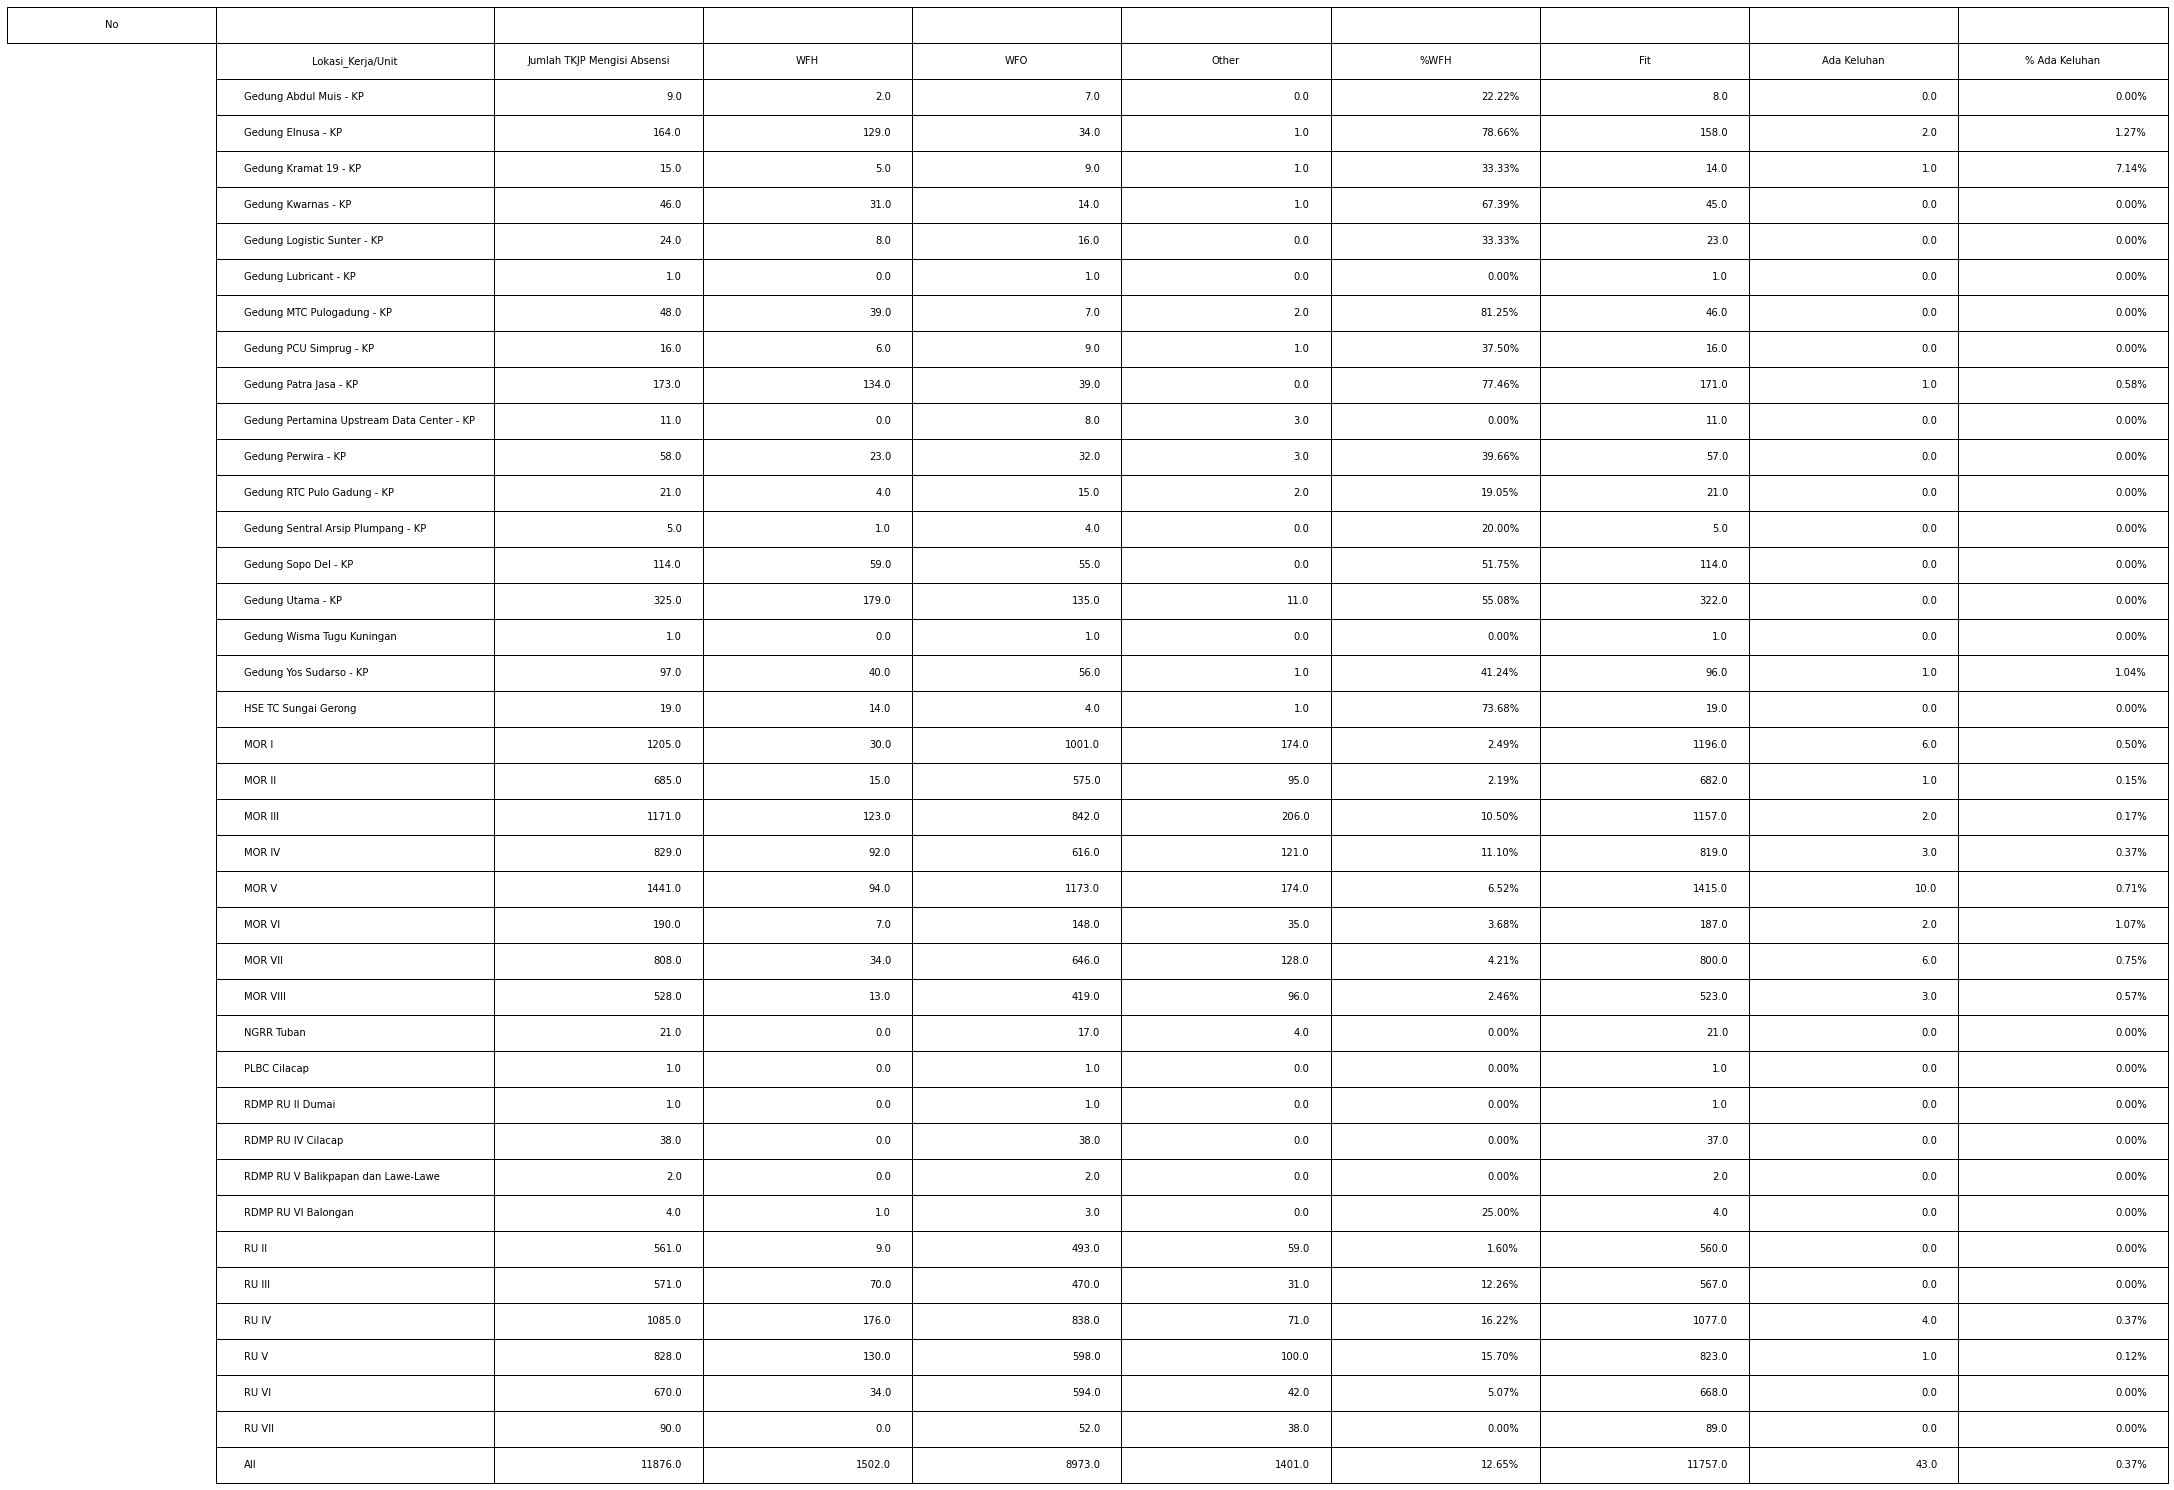

In [18]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

tab=ax.table(cellText=lala.values, colLabels=lala.columns,
             rowLabels=lala.index, loc='center')
tab.set_fontsize(24)
tab.scale(5, 3)
w, h = tab[0,1].get_width(), tab[0,1].get_height()
tab.add_cell(0, -1, w,h, text="Lokasi_Kerja/Unit", loc='center')
tab.add_cell(-1, -2, w,h, text="No",  loc='center')
i = -1
while i<=7:
    tab.add_cell(-1, i, w,h,  loc='center')
    i = i  + 1
#tab.cell(0,-1).merge(tab.cell(b-1,-1))




plt.show()

# FACET  

In [19]:
import seaborn as sns

In [49]:
g = sns.FacetGrid(lala, row =lala.iloc(lala.index).values)


TypeError: unhashable type: 'Index'